In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import norm, gaussian_kde
from sklearn.mixture import GaussianMixture

#import KDEpy

In [2]:
data = pd.read_csv('data_KDE_GM.csv')
data

,X,Y
0,-7.432474,0.738675
1,1.355525,-11.588993
2,-6.622975,-1.167688
3,-5.101732,-2.565564
4,-6.362525,-6.814269
...,...,...
3995,-7.775717,-0.526459
3996,-6.079989,-6.416442
3997,-5.718541,-0.254200
3998,-5.172632,-2.381801


In [3]:
x = data['X'].to_numpy()
y = data['Y'].to_numpy()

## a) Use scipy.stats.gaussian kde to perform a KDE on the data.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [4]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
# Use for plausibility check
print(xmin, xmax, ymin, ymax)

# Perform a kernel density estimate on the data:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

-12.712683310678226 5.176704039152524 -15.182971660197657 2.141739994732008


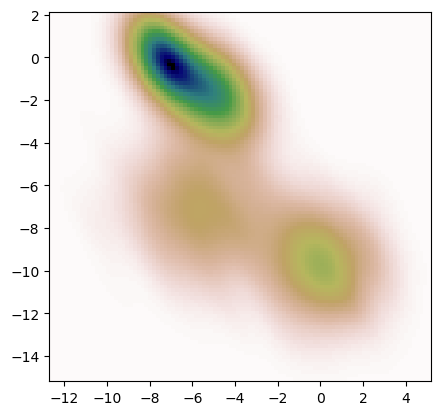

In [5]:
fig, ax = plt.subplots()
# plot KDE
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# plot data points
# ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

## b) Use sklearn.mixture.GaussianMixture to fit a gaussian mixture model for the provided data. Vary the number of components starting with 1 up to 5.


In [6]:
# Iteratively compute gaussian mixture for data and append it into a single df
for i in range (1,6):
    gm = GaussianMixture(n_components=i, random_state=0).fit(data)
    data['cluster' + str(i)] = gm.predict(data)

In [7]:
gm = GaussianMixture(n_components=5, random_state=0).fit(data)
c = gm.predict_proba(data)

## c)  Visualize and discuss your results

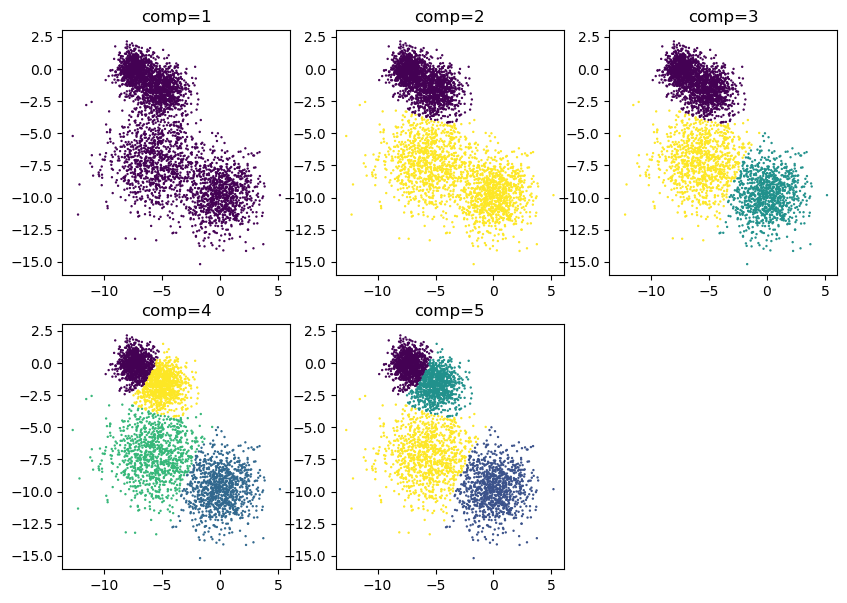

In [8]:
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2
a = np.random.rand(2,3)

# Visualize each component using a scatter plot
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    plt.scatter(data['X'], data['Y'],s = 2, c=data['cluster'+str(i)], marker=".")
    plt.title("comp="+str(i)) 
plt.show()